# Bayesian Classification using 2D Gaussian Distribution models 

This is the code for Problem P2.

In this code,we illustrate how a 2 dimensional data can be described by 2D Gaussian Distributions and using Bayesian decision criterion for binary classification how to find the appropriate decision boundary for the two classes.Also our aim is to visualize the changes in the decision boundary due to variation in the covariance matrices of the gaussian distributions.

In [1]:
import numpy as np
import math
from numpy.linalg import inv
import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

The probability density function of a multivariate gaussian random variable is defined in the function 'gaussian' whose parameters are $\mu$ and $\Sigma$.

In [2]:
def multivariate_gaussian(x,mu,sigma):
    n=x.shape
    x_bar=np.subtract(x,mu)
    x_bar_vec=np.array([x_bar])
    sigma_inv=np.linalg.inv(sigma)
    index=np.matmul(x_bar_vec,np.matmul(sigma_inv,x_bar_vec.T))
    num=math.exp(-0.5*index)
    den=(((2*np.pi)**(n[0]))*np.linalg.det(sigma))**0.5
    return num/den

Below is a binary classifier function which uses bayesian classification criterion.

In [3]:
def bin_classify(x,p0,M0,S0,p1,M1,S1):
    if p0*multivariate_gaussian(x,M0,S0)>p1*multivariate_gaussian(x,M1,S1):
        return 0
    else:
        return 1

In order to visualize the normal distributions and the decision boundary,the iso-probability contours and the discriminant functions are plotted using the following 'visualize' function.

In [4]:
def visualize(D,A0,B0,A1,B1,p1,M1,C1,p2,M2,C2):
    print("Iso-probability Contours: ")
    delta = 0.01
    x = np.arange(-15.0, 15.0, delta)
    y = np.arange(-20.0, 20.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = mlab.bivariate_normal(X, Y, C1[0][0], C1[1][1], M1[0], M1[1],C1[0][1])
    Z2 = mlab.bivariate_normal(X, Y, C2[0][0], C2[1][1], M2[0], M2[1],C2[0][1])
    plt.figure(figsize=(10, 10))
    CS1 = plt.contour(X, Y, Z1)
    CS2 = plt.contour(X, Y, Z2)
    plt.show()
    
    print("Data Points with Decision Boundaries:")
    plt.figure(figsize=(10, 10)) 
    plt.scatter(A0,B0)
    plt.scatter(A1,B1,c='r')
    X1, Y1 = np.mgrid[-10:10:2000j, -10:10:2000j]
    points = np.c_[X1.ravel(), Y1.ravel()]

    invC = np.linalg.inv(C1)
    v = points - M1
    g1 = -0.5*np.sum(np.dot(v, invC) * v, axis=1) - D*0.5*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(C1))+np.log(p1)
    g1.shape = 2000, 2000

    invC = np.linalg.inv(C2)
    v = points - M2
    g2 = -0.5*np.sum(np.dot(v, invC) * v, axis=1) - D*0.5*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(C2))+np.log(p2)
    g2.shape = 2000, 2000

    plt.contour(X1, Y1,g1-g2,levels=[0], cmap="Greys_r")
    plt.show()

The training dataset is loaded from the file "P2_train.csv" which is present the directory "P2_data/P2_data/".The test dataset is loaded from the file "P2_test.csv" which is present the same directory.

In [5]:
data=np.genfromtxt("P2_data/P2_data/P2_train.csv",delimiter=',')
test_data=np.genfromtxt("P2_data/P2_data/P2_test.csv",delimiter=',')

train_size=data.shape
test_size=test_data.shape

input=data[:,0:2]
labels=data[:,2:3]

test_input=test_data[:,0:2]
test_labels=test_data[:,2:3]

x=data[:,0]
y=data[:,1]

The parametric means $\mu_{0},\mu_{1}$ and covariance matrices $\Sigma_{0},\Sigma_{1}$ to zero vectors.

In [6]:
m0=np.zeros(train_size[1]-1)
n0=0
sigma0=np.zeros((train_size[1]-1,train_size[1]-1))

m1=np.zeros(train_size[1]-1)
n1=0
sigma1=np.zeros((train_size[1]-1,train_size[1]-1))

Here the means $\mu_{0},\mu_{1}$ are estimated using ML estimation criterion.

In [7]:
for i in range(train_size[0]):
    if labels[i]==0:
        m0=np.add(m0,input[i,:])
        n0+=1
    else:
        m1=np.add(m1,input[i,:])
        n1+=1
m0=m0/n0
m1=m1/n1


Similarly the covariance matrices $\Sigma_{0},\Sigma_{1}$ are estimated using ML estimation criterion.Also the datapoints corresponding to Class 0 and Class 1 are separated.

In [8]:
x_0=np.zeros(n0)
y_0=np.zeros(n0)
x_1=np.zeros(n1)
y_1=np.zeros(n1)
p=0
q=0
for i in range(train_size[0]):
    if labels[i]==0:
        x_0[p]=input[i][0]
        y_0[p]=input[i][1]
        p+=1
        X0=np.subtract(input[i],m0)
        X_vec=np.array([X0])
        pd=np.matmul(X_vec.T,X_vec)
        sigma0=np.add(sigma0,pd)
    else:
        x_1[q]=input[i][0]
        y_1[q]=input[i][1]
        q+=1
        X1=np.subtract(input[i],m1)
        X_vec=np.array([X1])
        pd=np.matmul(X_vec.T,X_vec)
        sigma1=np.add(sigma1,pd)
sigma0=sigma0/(n0-1)
sigma1=sigma1/(n1-1)

The apriori probabilities $\pi_{5}$ and $\pi_{6}$ are estimated as follows:<br>
$\pi_{0}$=(Number of examples in Class 0)/Total number of examples<br>
$\pi_{1}$=(Number of examples in Class 1)/Total number of examples<br>

In [9]:
prob_C0=n0/(n0+n1)
prob_C1=1-prob_C0

The following cases show how the decision boundary for the two classes varies with variation of the covariance matrices assumed for the probalistic models. The iso-probability contours and discriminant functions are shown.Also the confusion matrix and the misclassification rates are calculated for each case.
### Case A:<br>
#### 1. In this case, the covariance matrices are equal and is diagonal with diagonal elements equal(i.e equal to Var(x))


Case A(1):
Sigma:
[[ 3.72302425  0.        ]
 [ 0.          3.72302425]]
Confusion Matrix:
[[47  0]
 [ 3 40]]
False Negative Rate:0.06
False Positive Rate:0.0
Iso-probability Contours: 


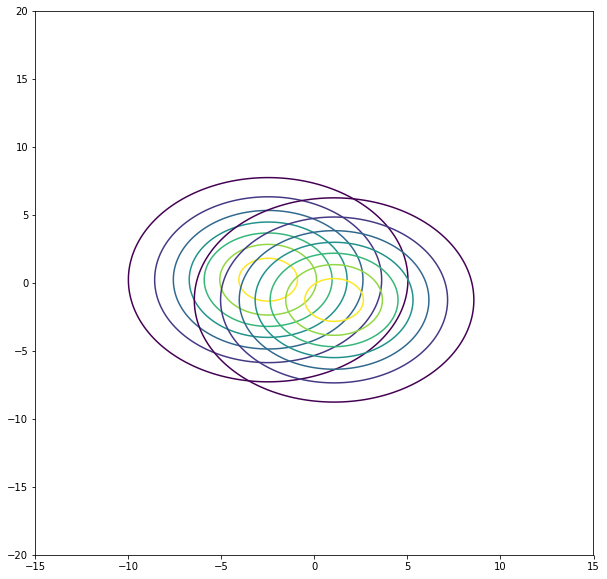

Data Points with Decision Boundaries:


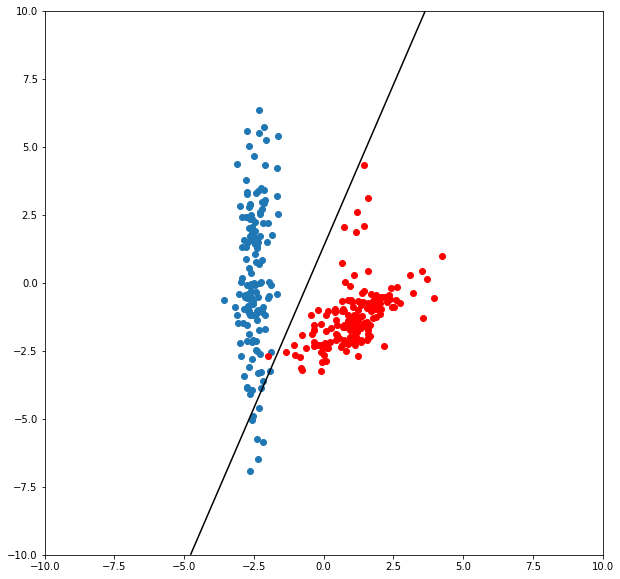

In [10]:
####CaseA(1)###
print("\nCase A(1):")
tp=0
tn=0
fp=0
fn=0

var_x=np.var(input[:,0:1],axis=0)
common_sigma=np.zeros((2,2))
common_sigma[0][0]=var_x
common_sigma[1][1]=var_x

print("Sigma:")
print(common_sigma)

pred_labels=np.zeros(test_size[0])
for i in range(test_size[0]):
    pred_labels[i]=bin_classify(test_input[i,:],prob_C0,m0,common_sigma,prob_C1,m1,common_sigma)

for i in range(test_size[0]):
    if pred_labels[i]==0:
        if pred_labels[i]==test_labels[i]:
            tp+=1
        else:
            fp+=1
    else:
        if pred_labels[i]==test_labels[i]:
            tn+=1
        else:
            fn+=1
conf_mat=[[tp,fp],[fn,tn]]
print("Confusion Matrix:")
print(np.array(conf_mat))
false_pos_rate=fp/(fp+tn)
false_neg_rate=fn/(tp+fn)
print("False Negative Rate:",end="")
print(false_neg_rate)
print("False Positive Rate:",end="")
print(false_pos_rate)
visualize(2,x_0,y_0,x_1,y_1,prob_C0,m0,common_sigma,prob_C1,m1,common_sigma)

#### 2. In this case, the covariance matrices are equal and is diagonal with diagonal elements equal(i.e equal to Var(y))


Case A(2):
Sigma:
[[ 4.62608594  0.        ]
 [ 0.          4.62608594]]
Confusion Matrix:
[[47  0]
 [ 3 40]]
False Negative Rate:0.06
False Positive Rate:0.0
Iso-probability Contours: 


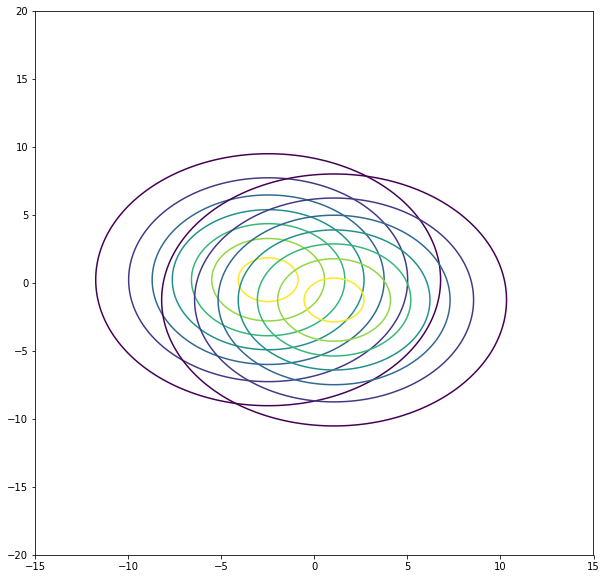

Data Points with Decision Boundaries:


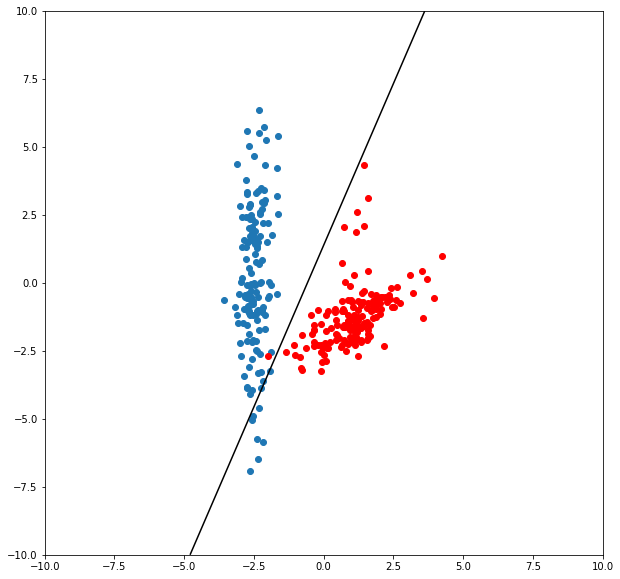

In [11]:
####CaseA(2)###
print("\nCase A(2):")
tp=0
tn=0
fp=0
fn=0

var_y=np.var(input[:,1:2],axis=0)
common_sigma=np.zeros((2,2))
common_sigma[0][0]=var_y
common_sigma[1][1]=var_y

print("Sigma:")
print(common_sigma)

pred_labels=np.zeros(test_size[0])
for i in range(test_size[0]):
    pred_labels[i]=bin_classify(test_input[i,:],prob_C0,m0,common_sigma,prob_C1,m1,common_sigma)

for i in range(test_size[0]):
    if pred_labels[i]==0:
        if pred_labels[i]==test_labels[i]:
            tp+=1
        else:
            fp+=1
    else:
        if pred_labels[i]==test_labels[i]:
            tn+=1
        else:
            fn+=1
conf_mat=[[tp,fp],[fn,tn]]
print("Confusion Matrix:")
print(np.array(conf_mat))
false_pos_rate=fp/(fp+tn)
false_neg_rate=fn/(tp+fn)
print("False Negative Rate:",end="")
print(false_neg_rate)
print("False Positive Rate:",end="")
print(false_pos_rate)
visualize(2,x_0,y_0,x_1,y_1,prob_C0,m0,common_sigma,prob_C1,m1,common_sigma)

### Case B:<br>
#### In this case, the covariance matrices are equal and is diagonal with diagonal elements a & b where a=Var(x) & b=Var(y)


Case B:
Sigma:
[[ 3.72302425  0.        ]
 [ 0.          4.62608594]]
Confusion Matrix:
[[49  0]
 [ 1 40]]
False Negative Rate:0.02
False Positive Rate:0.0
Iso-probability Contours: 


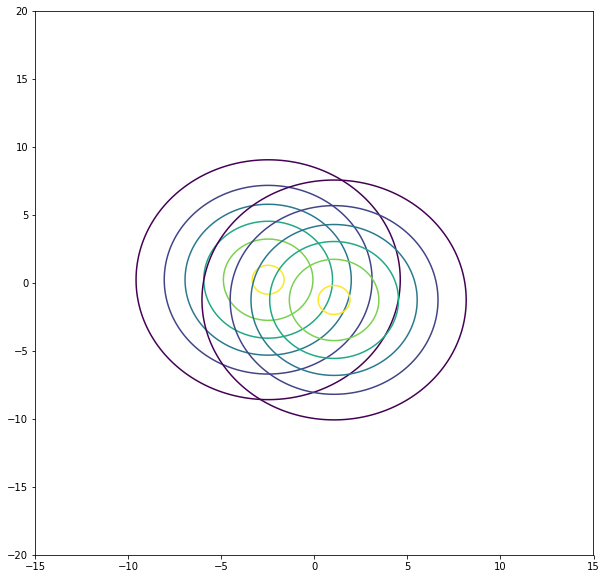

Data Points with Decision Boundaries:


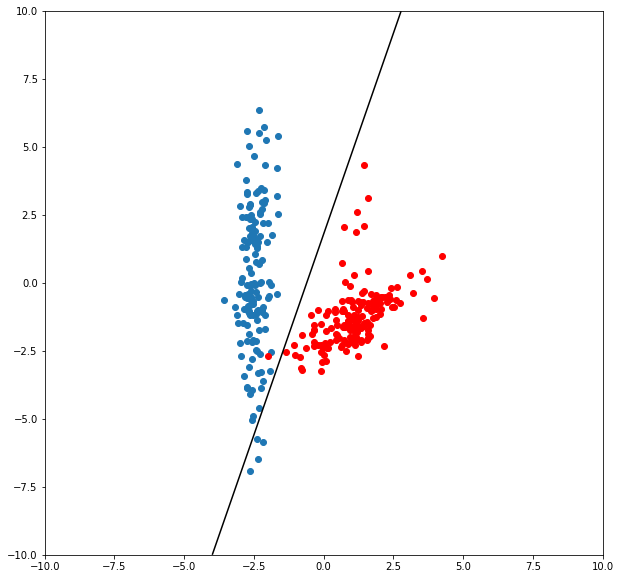

In [12]:
####CaseB###
print("\nCase B:")
tp=0
tn=0
fp=0
fn=0

var_x=np.var(x);
var_y=np.var(y)
common_sigma=np.zeros((2,2))
common_sigma[0][0]=var_x
common_sigma[1][1]=var_y

print("Sigma:")
print(common_sigma)

pred_labels=np.zeros(test_size[0])
for i in range(test_size[0]):
    pred_labels[i]=bin_classify(test_input[i,:],prob_C0,m0,common_sigma,prob_C1,m1,common_sigma)

for i in range(test_size[0]):
    if pred_labels[i]==0:
        if pred_labels[i]==test_labels[i]:
            tp+=1
        else:
            fp+=1
    else:
        if pred_labels[i]==test_labels[i]:
            tn+=1
        else:
            fn+=1
conf_mat=[[tp,fp],[fn,tn]]
print("Confusion Matrix:")
print(np.array(conf_mat))
false_pos_rate=fp/(fp+tn)
false_neg_rate=fn/(tp+fn)
print("False Negative Rate:",end="")
print(false_neg_rate)
print("False Positive Rate:",end="")
print(false_pos_rate)
visualize(2,x_0,y_0,x_1,y_1,prob_C0,m0,common_sigma,prob_C1,m1,common_sigma)

### Case C:<br>
#### In this case, the covariance matrices are equal and is equal to the empirical covariance of the entire dataset


Case C:
Sigma:
[[ 3.73507288 -0.97077412]
 [-0.97077412  4.64105709]]
Confusion Matrix:
[[50  1]
 [ 0 39]]
False Negative Rate:0.0
False Positive Rate:0.025
Iso-probability Contours: 


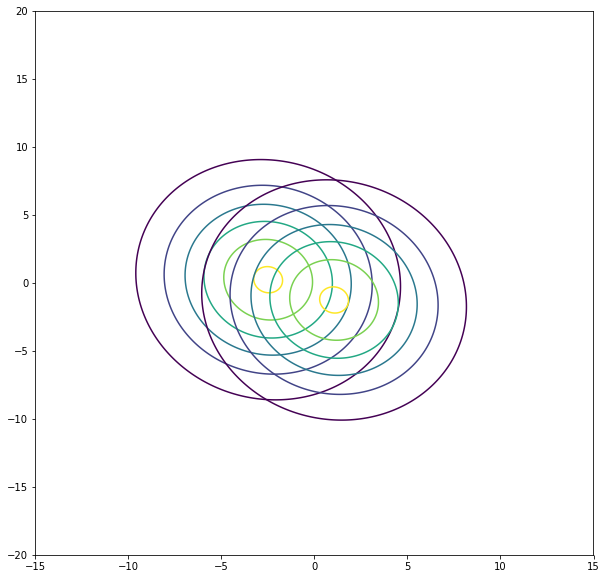

Data Points with Decision Boundaries:


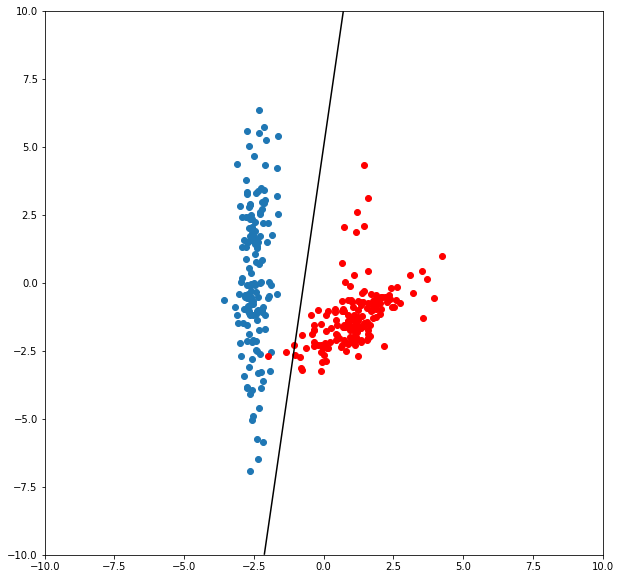

In [13]:
####CaseC###
print("\nCase C:")
tp=0
tn=0
fp=0
fn=0

common_sigma=np.cov(x,y)

print("Sigma:")
print(common_sigma)

pred_labels=np.zeros(test_size[0])
for i in range(test_size[0]):
    pred_labels[i]=bin_classify(test_input[i,:],prob_C0,m0,common_sigma,prob_C1,m1,common_sigma)

for i in range(test_size[0]):
    if pred_labels[i]==0:
        if pred_labels[i]==test_labels[i]:
            tp+=1
        else:
            fp+=1
    else:
        if pred_labels[i]==test_labels[i]:
            tn+=1
        else:
            fn+=1
conf_mat=[[tp,fp],[fn,tn]]
print("Confusion Matrix:")
print(np.array(conf_mat))
false_pos_rate=fp/(fp+tn)
false_neg_rate=fn/(tp+fn)
print("False Negative Rate:",end="")
print(false_neg_rate)
print("False Positive Rate:",end="")
print(false_pos_rate)
visualize(2,x_0,y_0,x_1,y_1,prob_C0,m0,common_sigma,prob_C1,m1,common_sigma)

### Case D:<br>
#### In this case, the covariance matrices are different and is equal to their empirical covariance of corresponding classes

Case D:
Sigma0:
[[ 0.10831131  0.10758079]
 [ 0.10758079  7.09661441]]
Sigma1:
[[ 1.04424178  0.58246437]
 [ 0.58246437  1.28875868]]
Confusion Matrix:
[[50  0]
 [ 0 40]]
False Negative Rate:0.0
False Positive Rate:0.0
Iso-probability Contours: 


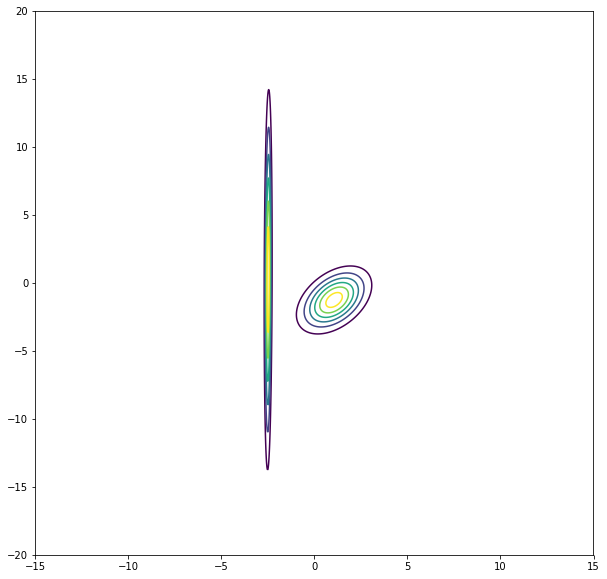

Data Points with Decision Boundaries:


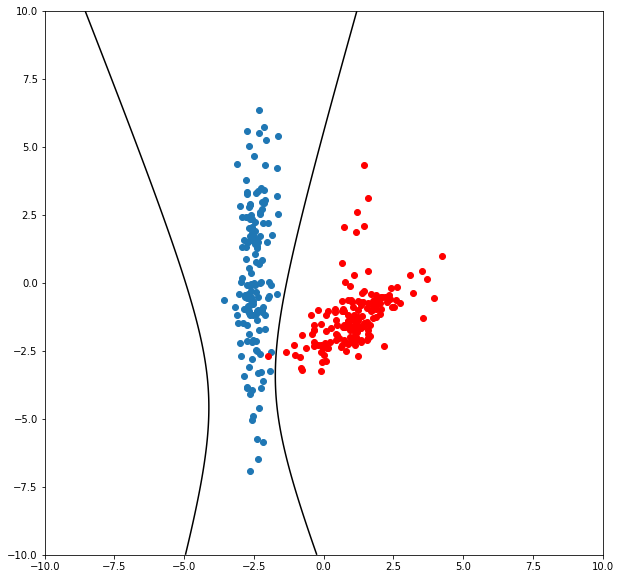

In [14]:
####CaseD####
print("Case D:")
tp=0
tn=0
fp=0
fn=0

print("Sigma0:")
print(sigma0)
print("Sigma1:")
print(sigma1)

pred_labels=np.zeros(test_size[0])
for i in range(test_size[0]):
    pred_labels[i]=bin_classify(test_input[i,:],prob_C0,m0,sigma0,prob_C1,m1,sigma1)

for i in range(test_size[0]):
    if pred_labels[i]==0:
        if pred_labels[i]==test_labels[i]:
            tp+=1
        else:
            fp+=1
    else:
        if pred_labels[i]==test_labels[i]:
            tn+=1
        else:
            fn+=1
conf_mat=[[tp,fp],[fn,tn]]
print("Confusion Matrix:")
print(np.array(conf_mat))
false_pos_rate=fp/(fp+tn)
false_neg_rate=fn/(tp+fn)
print("False Negative Rate:",end="")
print(false_neg_rate)
print("False Positive Rate:",end="")
print(false_pos_rate)
visualize(2,x_0,y_0,x_1,y_1,prob_C0,m0,sigma0,prob_C1,m1,sigma1)

From the above figures we conclude that the cases where the covariance matrices are same, the discriminant function is a straight line while for the unequal case it is parabolic.Moreover the misclassification rate is minimum for the case when the covariance matrices are unequal and are equal to the empirical covariance matrices of the corresponding classes. 